# Milan AirBnB Exploratory data analysis  
An exercise developed for CodeOp Module 3 milestone  

- Author: Margherita Serena Ferrara  
- Date: 25/11/2023  
- Contact: margheritaserena.ferrara@gmail.com

## [introduction]
- data source
- type of analysis performed
-- sections

## [main findings]

## Section 1: Import data & clean data

[which files we import]

### [Set up]

In [54]:
# Import revelant packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
import os
from folium.plugins import HeatMap

In [2]:
# Get folder paths
analysis_directory = os.getcwd()
parent_folder = os.path.dirname(analysis_directory)

### Listings  
[dataset shoudl contain all listings in Milan]

#### Import dataset

In [3]:
listings = pd.read_csv(parent_folder+'/MI AirBnB - dataset/listings.csv', delimiter = ',')

#### Explore data available
[identify varuiables of interest,
check whether variables need cleaning (NAs, weird symbols, convert in str/date etc)
]

In [4]:
# Explore the data
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24177 entries, 0 to 24176
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24177 non-null  int64  
 1   listing_url                                   24177 non-null  object 
 2   scrape_id                                     24177 non-null  int64  
 3   last_scraped                                  24177 non-null  object 
 4   source                                        24177 non-null  object 
 5   name                                          24177 non-null  object 
 6   description                                   23761 non-null  object 
 7   neighborhood_overview                         13101 non-null  object 
 8   picture_url                                   24177 non-null  object 
 9   host_id                                       24177 non-null 

##### Unique identifier  
[helpful to have unique identifier in teh dataset.
expert to be id]
we know there are 24177 entries

In [5]:
listings['id'].nunique() == listings.shape[0]

True

conclusion: all is good

#### Missing values
[description]

##### Drop fully missing variables
info() suggests that some variables are fully missing (such as neighbourhood). 
We drop these.

In [6]:
listings = listings.dropna(axis=1, how='all')

##### Explore other variables that contain NAs

In [7]:
listings.columns[listings.isna().any()]

Index(['description', 'neighborhood_overview', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'neighbourhood',
       'bathrooms_text', 'bedrooms', 'beds', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

One of the variables that contain NA values is 'bedrooms'
Explore this further

In [8]:
listings['bedrooms'].value_counts(dropna=False)


bedrooms
1.0     14361
NaN      5430
2.0      3657
3.0       587
4.0       103
5.0        27
6.0         5
7.0         3
10.0        2
8.0         1
11.0        1
Name: count, dtype: int64

5430 listings are registered with 0 bedrooms.
AirBnB website allows to select listings that have 1 or more bedrooms. 1 bedrooms listings also include studios.
> Decision: drop these observations

In [9]:
#Store these observations in another dataset
listings_no_bedroom = listings[listings['bedrooms'].isna()]

listings = listings.dropna(subset=['bedrooms'])
# Check that observations have been dropped
listings[listings['bedrooms'].isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


Go back to list of NA variables

In [10]:
listings.columns[listings.isna().any()]

Index(['description', 'neighborhood_overview', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'neighbourhood',
       'bathrooms_text', 'beds', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

they seem okay

#### Format variables
[description]

based on listings info notice two formatting to do:
price
calendar_last_scraped - not interested  

we explore price

In [11]:
listings['price']

1        $150.00
2        $171.00
3         $40.00
4         $94.00
6        $220.00
          ...   
24172     $90.00
24173    $119.00
24174    $113.00
24175     $83.00
24176     $96.00
Name: price, Length: 18747, dtype: object

need to remove dollar sign and convert into float

In [12]:
listings['price'] = listings['price'].str.replace('$', '')
# The variable price can't be immediately converted as float because the symbol ',' is not considered numerical.
listings['price'] = listings['price'].str.replace(',', '').astype(float)

# Note: quicker way to achieve this would have been with 
#   calendar['adjusted_price'] = calendar['adjusted_price'].replace('[$,]', '', regex=True).astype(float)

[conclusion: initial data cleaning of dataset listings is completed]

### Outliers

Explore price to identify outliers

<Axes: ylabel='price'>

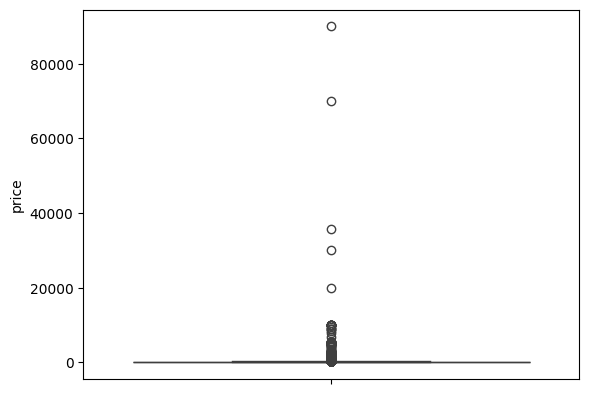

In [13]:
sns.boxplot(
    data = listings,
    y = 'price'
)

In [14]:
listings['price'].describe()

count    18747.00000
mean       206.14333
std        989.37974
min         10.00000
25%         90.00000
50%        128.00000
75%        200.00000
max      90000.00000
Name: price, dtype: float64

In [15]:
listings['price'].median()

128.0

Looked on airbnb and Milan's most expensive listing on the website (available any time) is around 2000.
Use 3000 as threshold

In [16]:
listings_no_outliers = listings[listings['price'] <= 3000]

<Axes: ylabel='price'>

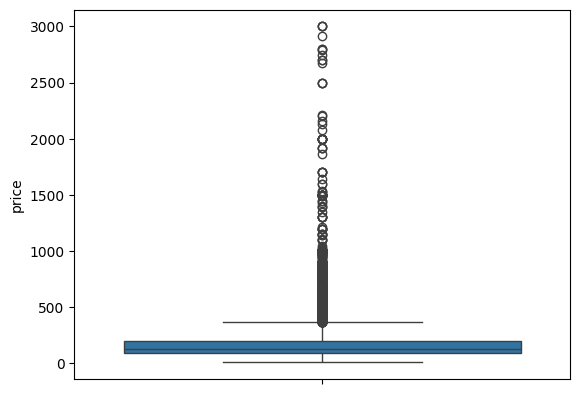

In [17]:
sns.boxplot(
    data = listings_no_outliers,
    y = 'price'
)

Still odd.
Use Inter quartile rule

In [18]:
# Calculate the IQR (Interquartile Range)
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
listings_no_outliers = listings[(listings['price'] >= lower_bound) & (listings['price'] <= upper_bound)]

Visualise how data distribution changed

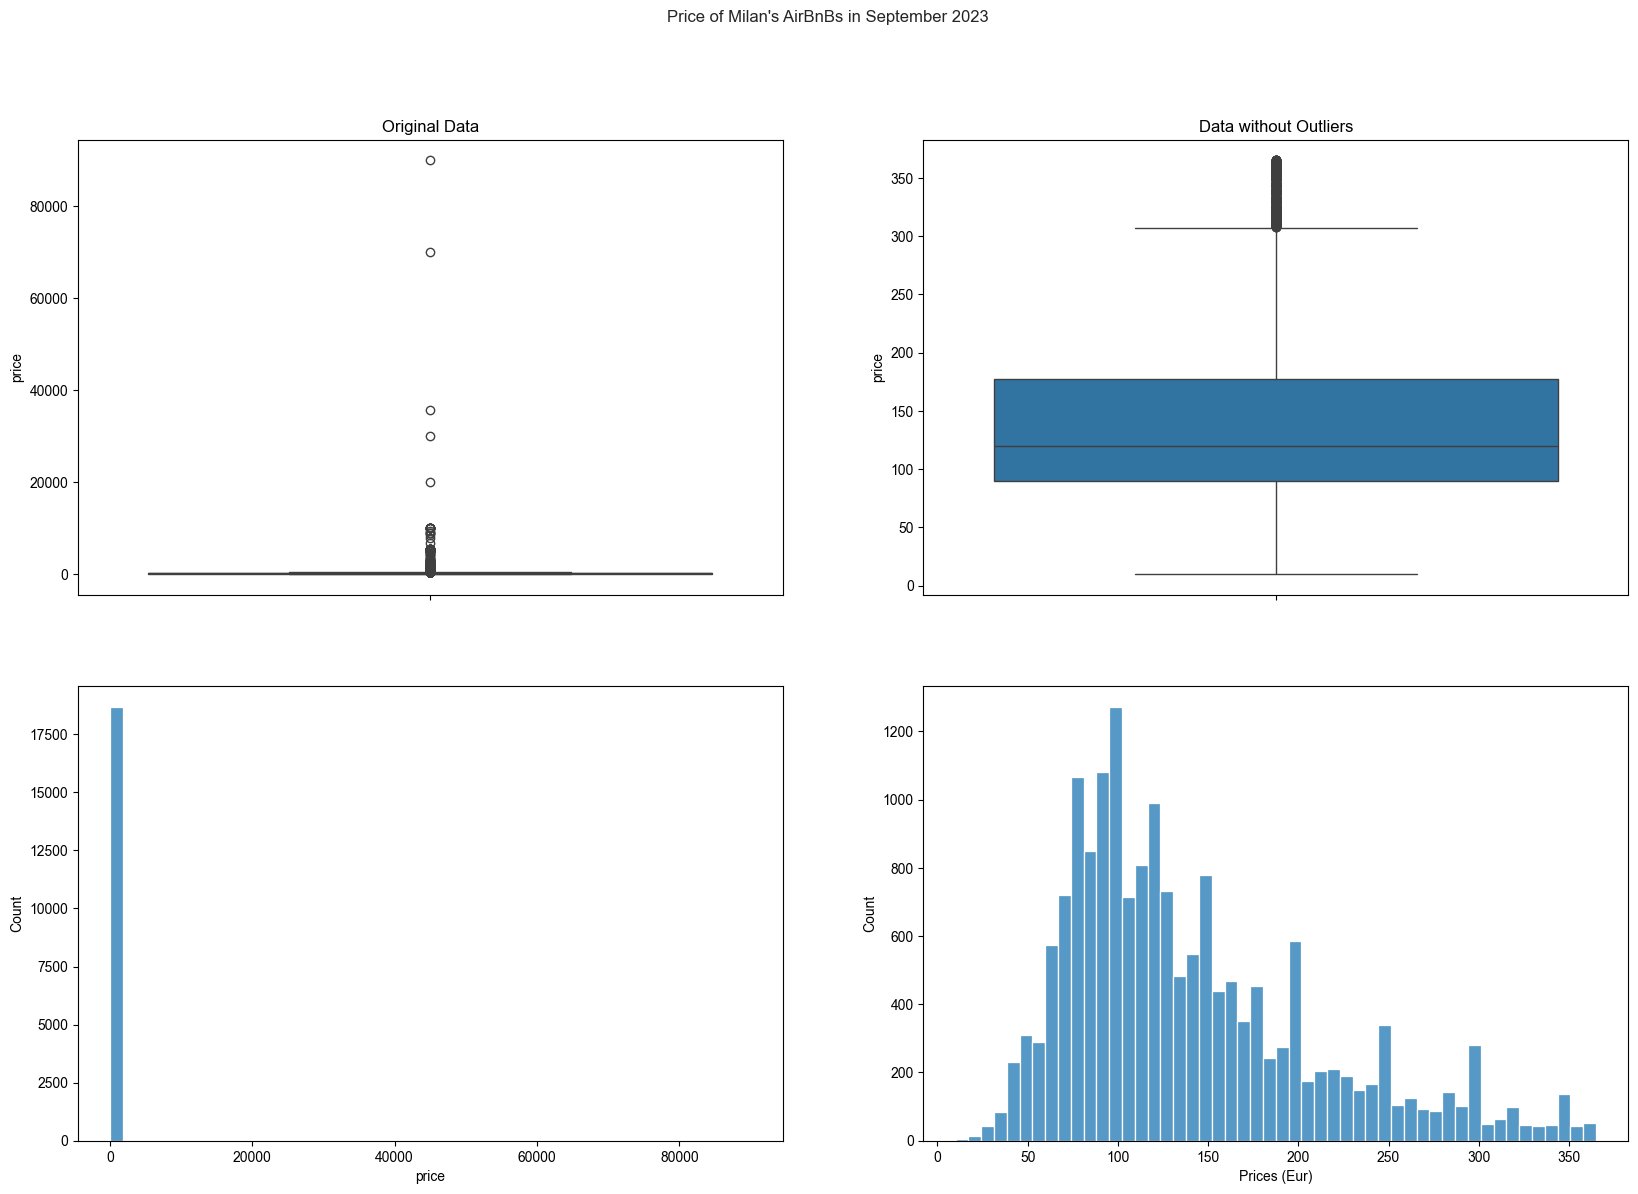

In [19]:
# Define the "subplot".
fig, axes = plt.subplots(
    nrows=2, 
    ncols=2,
    figsize=(20,13)
)

# Set up a stype
sns.set_style("darkgrid")

# Let's add a general title.
fig.suptitle("Price of Milan's AirBnBs in September 2023")

# Add subtitles to each subplot
axes[0,0].set_title("Original Data")
axes[0,1].set_title("Data without Outliers")

sns.boxplot(
    data = listings,
    y = 'price',
    ax = axes[0,0]
)

sns.boxplot(
    data = listings_no_outliers,
    y = 'price',
    ax = axes[0,1]
)

sns.histplot(
    data=listings, 
    x="price",
    bins = 50,
    ax = axes[1,0]
    )


sns.histplot(
    data=listings_no_outliers, 
    x="price",
    bins = 50,
    ax = axes[1,1]
    )

# label axis
_ =  plt.xlabel('Prices (Eur)')
_ = plt.ylabel('Count')

Data looks better now

In [20]:
# Rename datasets for ease
listings_incl_outliers = listings.copy()  # Create a copy to avoid modifying the original DataFrame
listings = listings_no_outliers.copy()  # Create a copy to avoid modifying the original DataFrame

### Calendar

#### Import dataset

In [21]:
calendar = pd.read_csv(parent_folder+'/MI AirBnB - dataset/calendar.csv')

#### Explore data available

In [22]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824261 entries, 0 to 8824260
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 471.3+ MB


In [23]:
# Price, price_adjusted and date are identified as objects
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6400,2023-09-14,f,$100.00,$100.00,4.0,5.0
1,6400,2023-09-15,f,$100.00,$100.00,4.0,5.0
2,6400,2023-09-16,f,$100.00,$100.00,4.0,5.0
3,6400,2023-09-17,f,$100.00,$100.00,4.0,5.0
4,6400,2023-09-18,f,$100.00,$100.00,4.0,5.0


#### Unique identifiers
This case probably not
check that listing_id is not missing

In [24]:
calendar[calendar['listing_id'].isna()]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights


No obs with missing id - good

In [25]:
calendar['listing_id'].nunique()

24177

#### Missing values

In [26]:
columns_with_na = calendar.columns[calendar.isna().any()]

print(columns_with_na)

Index(['price', 'adjusted_price', 'minimum_nights', 'maximum_nights'], dtype='object')


##### Drop fully missing variables

In [27]:
calendar = calendar.dropna(axis=1, how='all')
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824261 entries, 0 to 8824260
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 471.3+ MB


calendar.info() shows that no variable was fully missing.
However, some variables have na values(). we explore them

##### Explore other variables that contain NAs

look at how many observations are missing

In [28]:
calendar[columns_with_na].isna().sum()

price             171
adjusted_price    171
minimum_nights     15
maximum_nights     15
dtype: int64

a relatively small amount of observations have nas.
we drop those rows with NA price

In [29]:
calendar = calendar.dropna(subset=['price'])

In [30]:
calendar[columns_with_na].isna().sum()

price              0
adjusted_price     0
minimum_nights    15
maximum_nights    15
dtype: int64

same as price_adj - all good now

#### Format variables

price and date variables need formatting

In [31]:
calendar['price'] = calendar['price'].replace('[$,]', '', regex=True).astype(float)
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[$,]', '', regex=True).astype(float)
calendar['date'] = pd.to_datetime(calendar['date'], format = "%Y-%m-%d")
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8824090 entries, 0 to 8824260
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 538.6+ MB


calendar.info()shows that the conversion worked

[data cleaning done - for now]

## Section 2: Merge datasets

merge on variable listin_id

In [32]:
#first rename
listings = listings.rename(columns={'id': 'listing_id'})

mi_listings = pd.merge(listings, calendar, on='listing_id', how='outer', indicator=True)

how many observations were in common?
compare number of unique ids in the two datasets with those in the initial ones
mi_listings willhave same as listings
what about calendar?

In [33]:
mi_listings['_merge'].value_counts()

_merge
both          6335507
right_only    2488583
left_only           0
Name: count, dtype: int64

keep only vars in common`

In [34]:
# Extract calendar only data
right_only_data = mi_listings[mi_listings['_merge'] == 'right_only']['listing_id']
mi_listings = mi_listings[mi_listings['_merge'] == 'both']

### Cross checks

The additional listings in calendar are those of the observations we dropped with 0 bedrooms?
we check this comparing listings_no_bedroom and calendar

In [35]:
listings_no_bedroom = listings_no_bedroom.rename(columns={'id': 'listing_id'})
listings_no_bedroom_calendar = pd.merge(
    listings_no_bedroom['listing_id'], right_only_data,
    on = 'listing_id', how ='outer', indicator = True
    )

In [36]:
listings_no_bedroom_calendar['_merge'].value_counts()

_merge
both          1981598
right_only     506985
left_only           0
Name: count, dtype: int64

conclusion: ids dropped bc of no bedrooms  
same things with code below:
[listings_2 = listings_2.rename(columns = {'id':'listing_id'})
merge = pd.merge(
    listings_2['listing_id'], calendar,
    on = 'listing_id', how ='outer', indicator = True
    )
    listings_2 = pd.read_csv(parent_folder+'/MI AirBnB - dataset/listings.csv', delimiter = ',')

    merge['_merge'].unique()
    
    ]

## Section 3: Exploratory data analysis

### Local distribution of listings

- hist of neighbourhoods and ids  
- map

In [43]:
listings['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
BUENOS AIRES - VENEZIA    1312
DUOMO                      889
SARPI                      837
NAVIGLI                    749
LORETO                     732
                          ... 
MUGGIANO                     4
PARCO AGRICOLO SUD           3
SACCO                        3
PARCO NORD                   1
RONCHETTO DELLE RANE         1
Name: count, Length: 86, dtype: int64

In [44]:
# there are too many categories to do a countplot chart
# sns.countplot(
#     data=listings,
#     x='neighbourhood_cleansed')

In [61]:
median_latitude = listings['latitude'].median()
median_longitude = listings['longitude'].median()

milan_map = folium.Map(
    # starting location
    location = [median_latitude, median_longitude],
    zoom_start = 10.5,
    tiles = 'OpenStreetMap'
)
milan_map

In [63]:
# Import neighbourhoods
geojson_path = parent_folder+'/MI AirBnB - dataset/neighbourhoods.geojson'

In [59]:
# create summary table
neighborhood_counts = listings['neighbourhood_cleansed'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood', 'listing_count']
neighborhood_counts

,neighbourhood,listing_count
0,BUENOS AIRES - VENEZIA,1312
1,DUOMO,889
2,SARPI,837
3,NAVIGLI,749
4,LORETO,732
...,...,...
81,MUGGIANO,4
82,PARCO AGRICOLO SUD,3
83,SACCO,3
84,PARCO NORD,1


In [65]:
folium.Choropleth(
    geo_data = geojson_path,
    data = neighborhood_counts,
    columns = ['neighbourhood', 'listing_count'],
    key_on = 'feature.properties.neighbourhood',  # GeoJSON property for matching
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Listings',
).add_to(milan_map)

milan_map

Explore price

In [37]:
# # Define the "subplot".
# fig, axes = plt.subplots(
#     nrows=2, 
#     ncols=3,
#     figsize=(20,6)
# )

# # Let's add a general title.
# fig.suptitle("Price of Milan's AirBnBs in September 2023")

# # Add graphs at particular locations.
# sns.histplot(
#     data = listings,
#     x = "price",
#     ax = axes[0,0]
#     )

In [38]:
# sns.histplot(
#     # data = listings,
#     x = "price")

- first on separate datasets
- what are the min and max data?
- what is the distr of prices of listings?
- have prices changed over time?

- price - histogram 
- price box plot - outliers?
- price per room type and number of beds
```
sns.boxplot(data = listings,
           y = 'price', 
           hue = 'room_type')

sns.boxplot(
    data = listings,
    x = 'bedrooms', 
    y = 'price')
```
- price and amenities (do charts in same figure)
```
# First, define the "subplot".
fig, axes = plt.subplots(
    nrows=2, 
    ncols=3,
    figsize=(20,6)
)

# Let's add a general title.
fig.suptitle("Three graphs of the Iris dataset")

# Add graphs at particular locations.
sns.histplot(
    data = data,
    x = "sepal_length",
    ax = axes[0,0]
    # Note: need to specify box row and column in ax to specify which chart is updated
)

```
-- possible charts for this


sns.boxplot(data = listings,
           y = 'price', 
           x = 'air_conditioning')
```
- distr of id in neighbourhoods - bar charts + geography  
- distr of price in neighbourhoods  

- price and n reviews and scores
```
listings[['price', 'number_of_reviews', 'review_scores_rating']].corr()
```